In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
%matplotlib inline
import pandas_profiling
import sweetviz

In [162]:
train_df = pd.read_csv('train.csv')

In [163]:
test_df = pd.read_csv('test.csv')

In [164]:
train_df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [165]:
#test_df.isnull().sum()

In [166]:
train_df.drop('ID',axis=1,inplace=True)
test_df.drop('ID',axis=1,inplace=True)

In [167]:
X_Train = train_df[~train_df['Number_Weeks_Used'].isnull()].drop(['Number_Weeks_Used','Crop_Damage'],axis=1)

In [168]:
y_Train = train_df[~train_df['Number_Weeks_Used'].isnull()]['Number_Weeks_Used']#.drop('Number_Weeks_Used',axis=1)

In [169]:
X_Test = train_df[train_df['Number_Weeks_Used'].isnull()].drop(['Number_Weeks_Used','Crop_Damage'],axis=1)
X_test_Test = test_df[test_df['Number_Weeks_Used'].isnull()].drop(['Number_Weeks_Used'],axis=1)

In [170]:
X_Train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season
0,188,1,0,1,0,0,1
1,209,1,0,1,0,0,2
2,257,1,0,1,0,0,2
3,257,1,1,1,0,0,2
4,342,1,0,1,0,0,2
...,...,...,...,...,...,...,...
88853,3337,1,0,2,10,44,3
88854,3516,1,0,2,10,38,1
88855,3516,1,0,2,15,8,2
88856,3702,1,0,2,10,18,3


In [171]:
y_Train

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
88853    12.0
88854    20.0
88855    40.0
88856    25.0
88857    37.0
Name: Number_Weeks_Used, Length: 79858, dtype: float64

In [172]:
X_Test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season
5,448,0,1,1,0,0,2
6,448,0,1,1,0,0,2
10,1212,1,0,1,0,0,3
17,2401,0,1,1,0,0,1
35,257,0,0,3,30,0,2
...,...,...,...,...,...,...,...
88786,1785,1,0,2,60,16,2
88788,1898,1,0,2,15,3,1
88825,2542,1,0,2,10,21,2
88833,2687,1,0,2,10,21,2


In [173]:
from sklearn.ensemble import GradientBoostingRegressor

In [174]:
model = GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)

In [175]:
model.fit(X_Train,y_Train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [176]:
y_predicted = model.predict(X_Test)

In [177]:
model.score(X_Train,y_Train)

0.7251980302909288

In [178]:
train_df.loc[X_Test.index,'Number_Weeks_Used'] = pd.Series(np.round(model.predict(X_Test)),index=X_Test.index)

In [179]:
train_df.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [180]:
test_df.loc[X_test_Test.index,'Number_Weeks_Used'] = pd.Series(np.round(model.predict(X_test_Test)),index=X_test_Test.index)

In [181]:
test_df.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [182]:
train_df['Total_Weeks_Should_Use'] = train_df['Number_Weeks_Used'] + train_df['Number_Weeks_Quit']
test_df['Total_Weeks_Should_Use'] = test_df['Number_Weeks_Used'] + test_df['Number_Weeks_Quit']

In [183]:
train_df['Total_Dose_Used'] = train_df['Number_Doses_Week'] * train_df['Number_Weeks_Used']
test_df['Total_Dose_Used'] = test_df['Number_Doses_Week'] * test_df['Number_Weeks_Used']

In [184]:
train_df['Total_Dose_NotUsed'] = train_df['Number_Doses_Week'] * train_df['Number_Weeks_Quit']
test_df['Total_Dose_NotUsed'] = test_df['Number_Doses_Week'] * test_df['Number_Weeks_Quit']


train_df['Total_Dose_NotUsed_nan'] = np.where(train_df['Total_Dose_NotUsed']==0,1.0,0.0)
test_df['Total_Dose_NotUsed_nan'] = np.where(test_df['Total_Dose_NotUsed']==0,1.0,0.0)


train_df['Number_Weeks_Quit_nan'] = np.where(train_df['Number_Weeks_Quit']==0,1.0,0.0)
test_df['Number_Weeks_Quit_nan'] = np.where(test_df['Number_Weeks_Quit']==0,1.0,0.0)

In [185]:
train_df['Number_Doses_day'] = train_df['Number_Doses_Week']/7
test_df['Number_Doses_day'] = test_df['Number_Doses_Week']/7

train_df['Estimated/number'] =  train_df['Number_Doses_day'] / train_df['Estimated_Insects_Count'] 
test_df['Estimated/number'] =   test_df['Number_Doses_day'] / test_df['Estimated_Insects_Count']

In [186]:
con_features = [feature for feature in train_df.columns if len(train_df[feature].unique()) > 10 ]

In [187]:
con_features

['Estimated_Insects_Count',
 'Number_Doses_Week',
 'Number_Weeks_Used',
 'Number_Weeks_Quit',
 'Total_Weeks_Should_Use',
 'Total_Dose_Used',
 'Total_Dose_NotUsed',
 'Number_Doses_day',
 'Estimated/number']

In [188]:
train_df['Total_Dose_Used'] = np.log1p(train_df['Total_Dose_Used'])
train_df['Estimated_Insects_Count'] = np.log1p(train_df['Estimated_Insects_Count'])
train_df['Total_Dose_NotUsed'] = np.log1p(train_df['Total_Dose_NotUsed'])


test_df['Total_Dose_Used'] = np.log1p(test_df['Total_Dose_Used'])
test_df['Estimated_Insects_Count'] = np.log1p(test_df['Estimated_Insects_Count'])
test_df['Total_Dose_NotUsed'] = np.log1p(test_df['Total_Dose_NotUsed'])



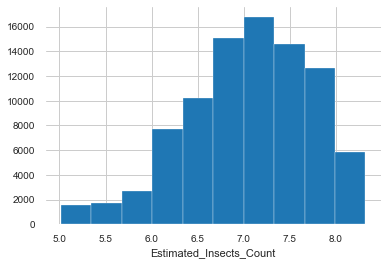

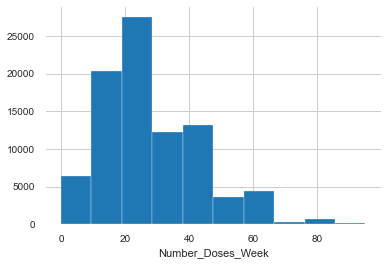

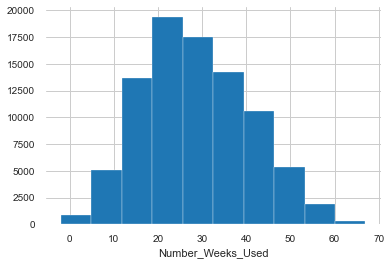

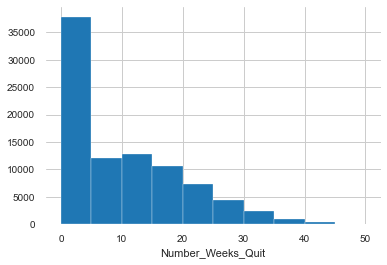

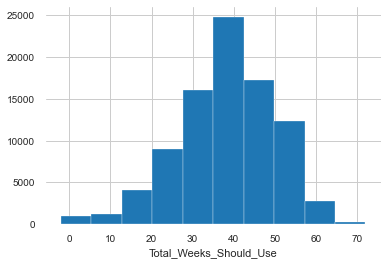

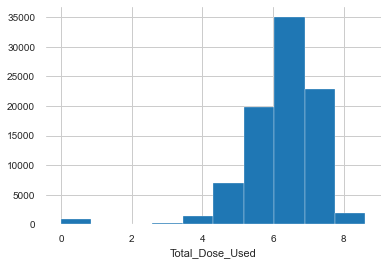

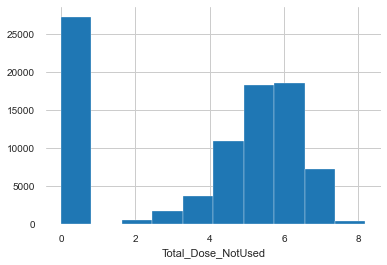

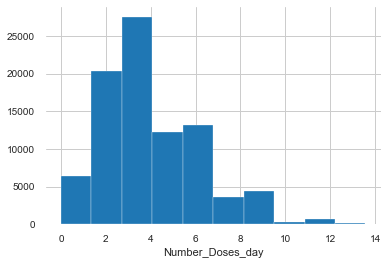

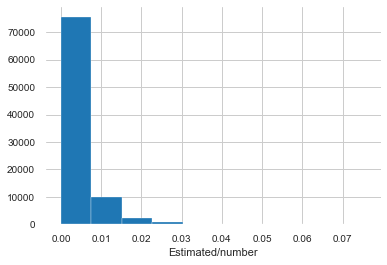

In [189]:
for feature in con_features:
    train_df[feature].hist()
    plt.xlabel(feature)
    plt.show()

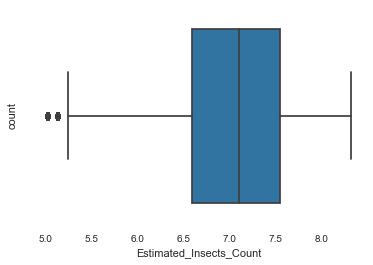

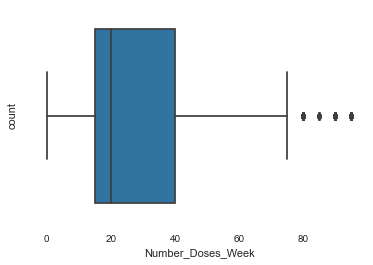

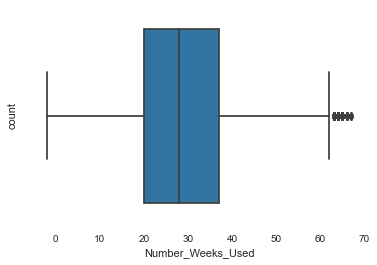

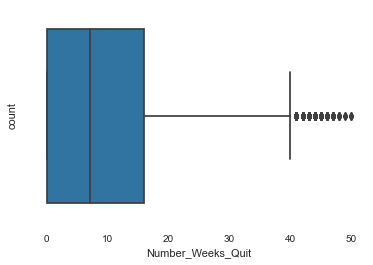

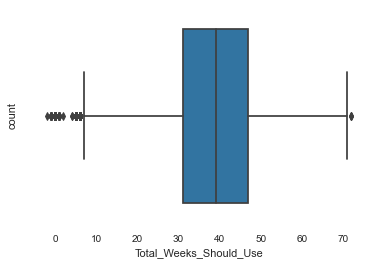

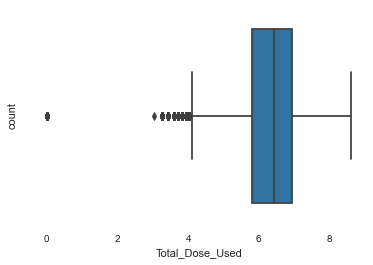

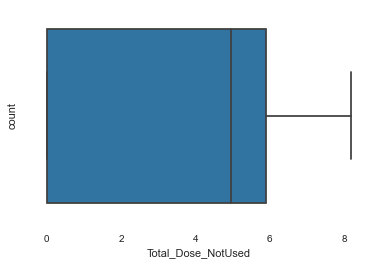

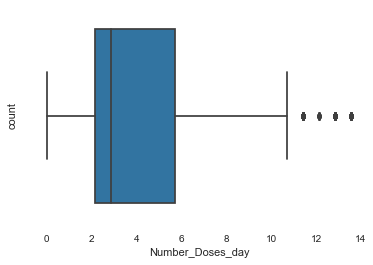

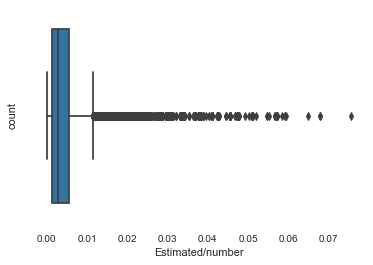

In [190]:
for feature in con_features:
    sns.boxplot(x=feature,data=train_df)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

In [192]:
train_df['Crop_Damage'].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [193]:
from sklearn.model_selection import train_test_split
df_train, df_eval = train_test_split(train_df,test_size=0.20, shuffle=True, stratify=train_df['Crop_Damage'])

In [200]:
df_train['Crop_Damage'].value_counts()

0    59390
1    29538
2    20350
Name: Crop_Damage, dtype: int64

In [196]:
fix_1 = df_train[df_train['Crop_Damage']==1]

In [197]:
fix_2 = df_train[df_train['Crop_Damage']==2]

In [198]:
for i in range(2):
    df_train = pd.concat([df_train,fix_1],axis=0)

In [199]:
for i in range(10):
    df_train = pd.concat([df_train,fix_2],axis=0)

In [201]:
df_train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Weeks_Should_Use,Total_Dose_Used,Total_Dose_NotUsed,Total_Dose_NotUsed_nan,Number_Weeks_Quit_nan,Number_Doses_day,Estimated/number
84691,6.963190,0,0,2,30,42.0,2,3,0,44.0,7.139660,4.110874,0.0,0.0,4.285714,0.004058
24462,6.673298,0,1,2,20,22.0,16,3,0,38.0,6.089045,5.771441,0.0,0.0,2.857143,0.003617
60315,7.299121,0,1,2,10,12.0,28,2,0,40.0,4.795791,5.638355,0.0,0.0,1.428571,0.000967
20865,7.032624,1,0,3,20,42.0,0,3,1,42.0,6.734592,0.000000,1.0,1.0,2.857143,0.002524
48334,5.451038,1,0,1,0,0.0,0,1,0,0.0,0.000000,0.000000,1.0,1.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27502,8.165364,0,1,2,20,45.0,14,1,2,59.0,6.803505,5.638355,0.0,0.0,2.857143,0.000813
2915,7.951911,0,0,3,20,57.0,0,1,2,57.0,7.039660,0.000000,1.0,1.0,2.857143,0.001006
5573,6.276643,1,1,3,30,28.0,0,3,2,28.0,6.734592,0.000000,1.0,1.0,4.285714,0.008071
15293,7.608871,0,0,1,0,0.0,0,3,2,0.0,0.000000,0.000000,1.0,1.0,0.000000,0.000000


In [202]:
feature_cols = df_train.columns.tolist()
feature_cols.remove('Crop_Damage')
label_col = 'Crop_Damage'
print(len(feature_cols),feature_cols)

15 ['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit', 'Season', 'Total_Weeks_Should_Use', 'Total_Dose_Used', 'Total_Dose_NotUsed', 'Total_Dose_NotUsed_nan', 'Number_Weeks_Quit_nan', 'Number_Doses_day', 'Estimated/number']


In [203]:
cat_cols = ['Crop_Type','Soil_Type','Season','Total_Dose_NotUsed_nan','Number_Weeks_Quit_nan','Pesticide_Use_Category']

In [235]:
params = {}
params['learning_rate'] = 0.05
params['max_depth'] = 18
params['n_estimators'] = 2000
params['objective'] = 'multiclass'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.7
params['colsample_bytree']=1
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 20
params['reg_lambda'] = 20

In [236]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,f1_score

In [237]:
clf = LGBMClassifier(**params)
    
clf.fit(df_train[feature_cols], df_train[label_col], early_stopping_rounds=200, eval_set=[(df_train[feature_cols], df_train[label_col]), (df_eval[feature_cols], df_eval[label_col])], eval_metric='multi_error', verbose=True, categorical_feature=cat_cols)

eval_score = f1_score(df_eval[label_col], clf.predict(df_eval[feature_cols]),average='macro')

print('Eval ACC: {}'.format(eval_score))

[1]	valid_0's multi_error: 0.456524	valid_0's multi_logloss: 0.984199	valid_1's multi_error: 0.164528	valid_1's multi_logloss: 0.723999
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_error: 0.456524	valid_0's multi_logloss: 0.971521	valid_1's multi_error: 0.164528	valid_1's multi_logloss: 0.714386
[3]	valid_0's multi_error: 0.456524	valid_0's multi_logloss: 0.959838	valid_1's multi_error: 0.164528	valid_1's multi_logloss: 0.705449
[4]	valid_0's multi_error: 0.456524	valid_0's multi_logloss: 0.949045	valid_1's multi_error: 0.164528	valid_1's multi_logloss: 0.697172
[5]	valid_0's multi_error: 0.456524	valid_0's multi_logloss: 0.939098	valid_1's multi_error: 0.164528	valid_1's multi_logloss: 0.689493
[6]	valid_0's multi_error: 0.456524	valid_0's multi_logloss: 0.929822	valid_1's multi_error: 0.164528	valid_1's multi_logloss: 0.682286
[7]	valid_0's multi_error: 0.456524	valid_0's multi_logloss: 0.92125	valid_1's multi_error: 0.164528	valid_1's multi_loglo

[64]	valid_0's multi_error: 0.361656	valid_0's multi_logloss: 0.784275	valid_1's multi_error: 0.220347	valid_1's multi_logloss: 0.577379
[65]	valid_0's multi_error: 0.360841	valid_0's multi_logloss: 0.783632	valid_1's multi_error: 0.220234	valid_1's multi_logloss: 0.577071
[66]	valid_0's multi_error: 0.360329	valid_0's multi_logloss: 0.783048	valid_1's multi_error: 0.220684	valid_1's multi_logloss: 0.576836
[67]	valid_0's multi_error: 0.359807	valid_0's multi_logloss: 0.78248	valid_1's multi_error: 0.221303	valid_1's multi_logloss: 0.576612
[68]	valid_0's multi_error: 0.358526	valid_0's multi_logloss: 0.781876	valid_1's multi_error: 0.221191	valid_1's multi_logloss: 0.576348
[69]	valid_0's multi_error: 0.357629	valid_0's multi_logloss: 0.781263	valid_1's multi_error: 0.221359	valid_1's multi_logloss: 0.576044
[70]	valid_0's multi_error: 0.356915	valid_0's multi_logloss: 0.780773	valid_1's multi_error: 0.221641	valid_1's multi_logloss: 0.575941
[71]	valid_0's multi_error: 0.356659	valid

[125]	valid_0's multi_error: 0.34792	valid_0's multi_logloss: 0.760098	valid_1's multi_error: 0.224904	valid_1's multi_logloss: 0.570282
[126]	valid_0's multi_error: 0.347545	valid_0's multi_logloss: 0.759829	valid_1's multi_error: 0.224904	valid_1's multi_logloss: 0.570188
[127]	valid_0's multi_error: 0.347133	valid_0's multi_logloss: 0.759552	valid_1's multi_error: 0.224904	valid_1's multi_logloss: 0.57012
[128]	valid_0's multi_error: 0.347023	valid_0's multi_logloss: 0.75927	valid_1's multi_error: 0.224904	valid_1's multi_logloss: 0.570037
[129]	valid_0's multi_error: 0.346694	valid_0's multi_logloss: 0.758979	valid_1's multi_error: 0.224679	valid_1's multi_logloss: 0.569982
[130]	valid_0's multi_error: 0.346794	valid_0's multi_logloss: 0.75874	valid_1's multi_error: 0.224229	valid_1's multi_logloss: 0.569962
[131]	valid_0's multi_error: 0.346749	valid_0's multi_logloss: 0.758496	valid_1's multi_error: 0.224285	valid_1's multi_logloss: 0.569888
[132]	valid_0's multi_error: 0.346602	

[187]	valid_0's multi_error: 0.338275	valid_0's multi_logloss: 0.745557	valid_1's multi_error: 0.223385	valid_1's multi_logloss: 0.567235
[188]	valid_0's multi_error: 0.338293	valid_0's multi_logloss: 0.745372	valid_1's multi_error: 0.223329	valid_1's multi_logloss: 0.56717
[189]	valid_0's multi_error: 0.338074	valid_0's multi_logloss: 0.745146	valid_1's multi_error: 0.223273	valid_1's multi_logloss: 0.567145
[190]	valid_0's multi_error: 0.338028	valid_0's multi_logloss: 0.744951	valid_1's multi_error: 0.223104	valid_1's multi_logloss: 0.567096
[191]	valid_0's multi_error: 0.337634	valid_0's multi_logloss: 0.744725	valid_1's multi_error: 0.222991	valid_1's multi_logloss: 0.567044
[192]	valid_0's multi_error: 0.337616	valid_0's multi_logloss: 0.744539	valid_1's multi_error: 0.223047	valid_1's multi_logloss: 0.567018
[193]	valid_0's multi_error: 0.337085	valid_0's multi_logloss: 0.744343	valid_1's multi_error: 0.223047	valid_1's multi_logloss: 0.566994
[194]	valid_0's multi_error: 0.3366

In [238]:
best_iter = clf.best_iteration_
params['n_estimators'] = best_iter
print(params)

{'learning_rate': 0.05, 'max_depth': 18, 'n_estimators': 16, 'boosting_type': 'gbdt', 'subsample': 0.7, 'colsample_bytree': 1, 'min_data_in_leaf': 55, 'reg_alpha': 20, 'reg_lambda': 20}


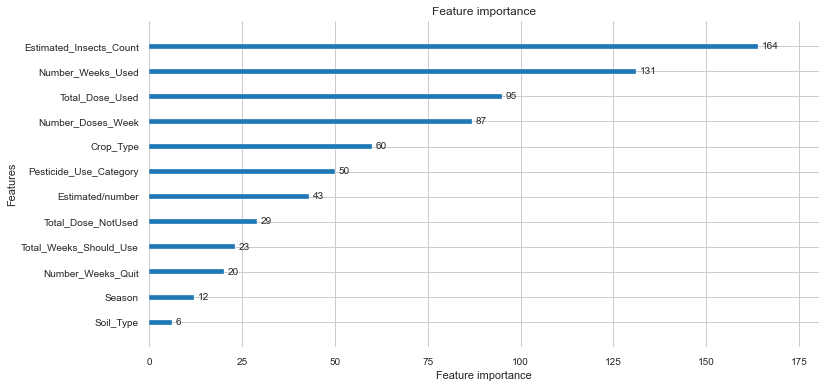

In [208]:
from lightgbm import plot_importance
plt.rcParams['figure.figsize'] = (12, 6)
plot_importance(clf)
plt.show()

In [209]:
train_df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Weeks_Should_Use,Total_Dose_Used,Total_Dose_NotUsed,Total_Dose_NotUsed_nan,Number_Weeks_Quit_nan,Number_Doses_day,Estimated/number
0,5.241747,1,0,1,0,0.0,0,1,0,0.0,0.000000,0.000000,1.0,1.0,0.000000,0.000000
1,5.347108,1,0,1,0,0.0,0,2,1,0.0,0.000000,0.000000,1.0,1.0,0.000000,0.000000
2,5.552960,1,0,1,0,0.0,0,2,1,0.0,0.000000,0.000000,1.0,1.0,0.000000,0.000000
3,5.552960,1,1,1,0,0.0,0,2,1,0.0,0.000000,0.000000,1.0,1.0,0.000000,0.000000
4,5.837730,1,0,1,0,0.0,0,2,1,0.0,0.000000,0.000000,1.0,1.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88853,8.113127,1,0,2,10,12.0,44,3,0,56.0,4.795791,6.089045,0.0,0.0,1.428571,0.000428
88854,8.165364,1,0,2,10,20.0,38,1,0,58.0,5.303305,5.942799,0.0,0.0,1.428571,0.000406
88855,8.165364,1,0,2,15,40.0,8,2,0,48.0,6.398595,4.795791,0.0,0.0,2.142857,0.000609
88856,8.216899,1,0,2,10,25.0,18,3,0,43.0,5.525453,5.198497,0.0,0.0,1.428571,0.000386


In [210]:
test_df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Total_Weeks_Should_Use,Total_Dose_Used,Total_Dose_NotUsed,Total_Dose_NotUsed_nan,Number_Weeks_Quit_nan,Number_Doses_day,Estimated/number
0,5.241747,1,1,1,0,-0.0,0,2,0.0,-0.000000,0.000000,1.0,1.0,0.000000,0.000000
1,6.018593,1,1,1,0,0.0,0,2,0.0,0.000000,0.000000,1.0,1.0,0.000000,0.000000
2,6.440947,1,0,1,0,0.0,0,2,0.0,0.000000,0.000000,1.0,1.0,0.000000,0.000000
3,6.595781,1,0,1,0,0.0,0,2,0.0,0.000000,0.000000,1.0,1.0,0.000000,0.000000
4,6.672033,0,0,1,0,0.0,0,1,0.0,0.000000,0.000000,1.0,1.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59305,8.113127,1,0,2,20,34.0,12,1,46.0,6.523562,5.484797,0.0,0.0,2.857143,0.000856
59306,8.165364,1,0,2,20,32.0,10,2,42.0,6.463029,5.303305,0.0,0.0,2.857143,0.000813
59307,8.216899,1,0,2,10,7.0,48,1,55.0,4.262680,6.175867,0.0,0.0,1.428571,0.000386
59308,8.216899,1,0,2,10,28.0,17,2,45.0,5.638355,5.141664,0.0,0.0,1.428571,0.000386


In [212]:
sub = pd.read_csv('sample_submission.csv')

In [213]:
sub

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1
...,...,...
59305,F00155901,1
59306,F00155912,1
59307,F00155930,1
59308,F00155933,1


In [214]:
sub['Crop_Damage'] = clf.predict(test_df)

In [215]:
sub.to_csv('output.csv',index=False)

In [216]:
df = pd.read_csv('output.csv')

In [217]:
df['Crop_Damage'].value_counts()

0    57980
1     1015
2      315
Name: Crop_Damage, dtype: int64